In [2]:
import numpy as np
import matplotlib.pyplot as plt
from albumentations import (
    Flip, Rotate, Blur, Compose
)

In [18]:
class Album_aug():
    
    @staticmethod
    def album_rotate(prob, lim:tuple ):
        return Rotate(limit=lim, p=prob)

    @staticmethod
    def album_blur(prob, lim):
        return Blur(blur_limit=lim, p=prob)

    @staticmethod
    def album_flip(prob):
        return Flip(p=prob)
    
    @staticmethod
    def strong_aug(p=0.5):
        return Compose([
            Flip(),
            Rotate(limit=(-360, 360)),
            Blur(blur_limit=10)
        ], p=p)




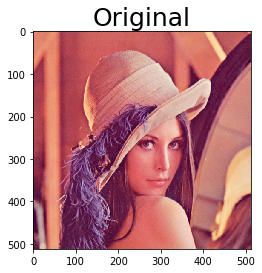

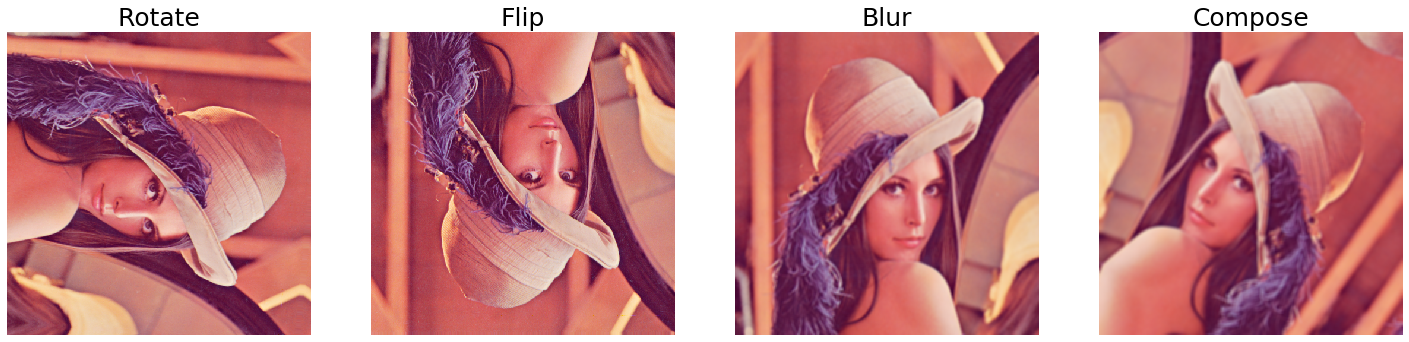

In [20]:
rotate = Album_aug.album_rotate(1, (-360, 360))
blur = Album_aug.album_blur(1, 10)
flip = Album_aug.album_flip(1)

aug = Album_aug.strong_aug(0.9)

augmented = aug(image=img)


plt.rcParams['axes.titlesize'] = 25
img = plt.imread('Lenna.png')
plt.imshow(img, cmap = 'gray')
plt.title('Original')
plt.show()


plt.figure(figsize=[25,10])
plt.subplot(141)
plt.imshow(rotate.apply(img, **rotate.get_params()),cmap = 'gray')
plt.title('Rotate')
plt.axis('off')

plt.subplot(142)
plt.imshow(flip.apply(img, **flip.get_params()),cmap = 'gray')
plt.title('Flip')
plt.axis('off')

plt.subplot(143)
plt.imshow(blur.apply(img, **blur.get_params()),cmap = 'gray')
plt.title("Blur")
plt.axis('off')

plt.subplot(144)
plt.imshow(augmented['image'])
plt.title("Compose")
plt.axis('off')

plt.show()
